# 住宅価格（モデルセット）について

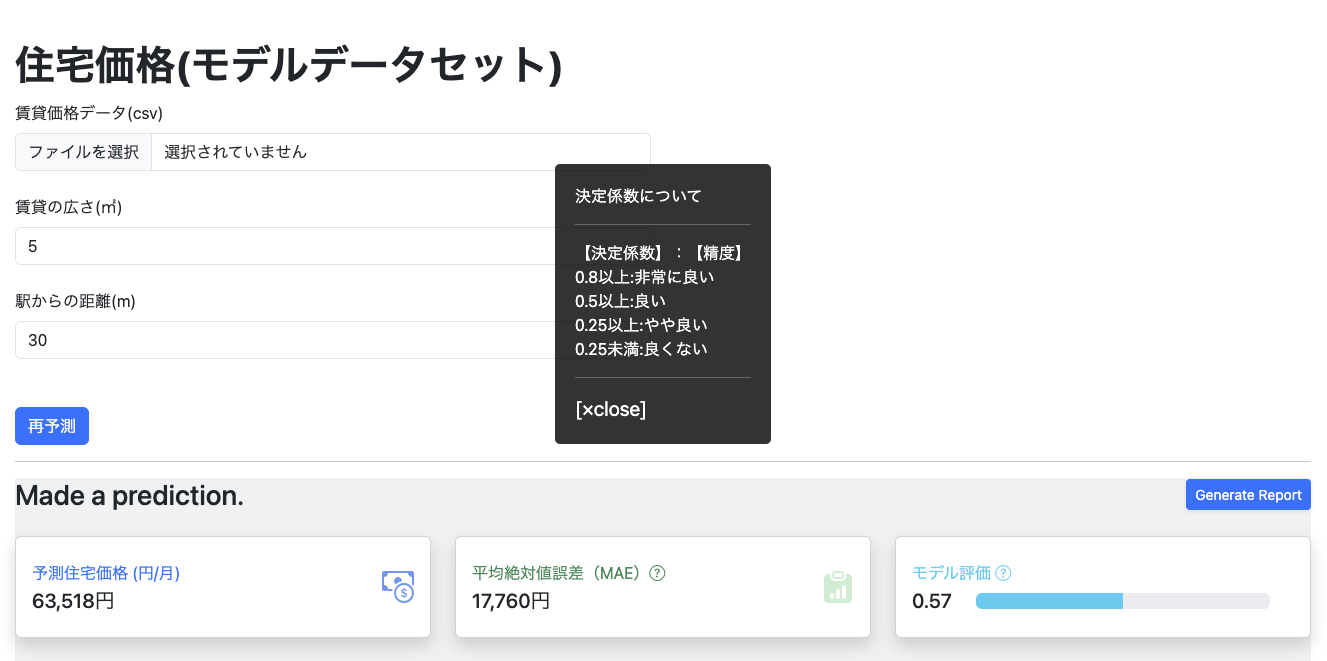

## 機能面に関して

### 【値のセット】
- 賃貸価格データ(csv):下記のテーブルに準じたCSVデータを挿入。

- 賃貸の広さ(㎡)：希望の賃貸の広さを入力。

- 駅からの距離(m):最寄り駅から距離を入力。

### 【予測ボタン：押下】
- 予測の賃貸価格(円/月)が表示される。
- 平均絶対値誤差：予測値と正解値の誤差を平均にした値。
- モデル評価：機械学習で用いられているモデルの評価値

<hr>

## 賃貸価格(モデルセット)で用いたモデル

In [1]:
# モジュールのインポート
import math
import pandas as pd
# Ridge Regressionモデルクラスの読み込み
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
# scikit-learnの準備
from sklearn.model_selection import train_test_split
# 線形回帰で学習
from sklearn import linear_model

In [2]:
# データの読み込みと観測
# データフレームの先頭5行のみ表示
df = pd.read_csv('./data/train.csv')
df.head()

,rent_price,house_area,year_from_built,distance,built_date,balcony_area,house_structure,floor,total_floor
0,81000.0,22.627647,21,360.0,2001-04-01,0.0,RC,4.0,10.0
1,119000.0,29.487423,11,720.0,2011-03-01,0.0,RC,3.0,10.0
2,65000.0,13.960667,32,640.0,1990-03-01,0.0,RC,3.0,6.0
3,230000.0,79.860208,13,480.0,2009-03-01,0.0,RC,15.0,29.0
4,102000.0,34.471313,23,320.0,1999-05-01,0.0,RC,2.0,7.0


In [3]:
# (行数、カラム数)
df.shape

(7496, 9)

#### データ観測から予測したい値を決める
- 予測したい値：rent_price(賃貸価格)

#### 特徴量を決める
- house_area (広さ)
- distance (駅からの距離)

In [5]:
#特徴量と正解データの設定

## 使いたい特徴量
feature_cols = ['house_area','distance']

## 予測したい列
target_col = 'rent_price'

x = df[feature_cols]
y = df[target_col]

In [6]:
# 訓練データとテストデータに8:2で分割
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# モデル学習
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# 訓練データを用いた評価
model_ases_tra = model.score(X_train, y_train)
# テストデータを用いた評価
model_ases_tes = model.score(X_test, y_test)
print(f'訓練データのモデル評価:{model_ases_tra:.4f}')
print(f'テストデータのモデルの評価:{model_ases_tes:.4f}')

訓練データのモデル評価:0.5728
テストデータのモデルの評価:0.6006


In [8]:
# 学習したモデルを用いて予想
df['pred_rent_price'] = model.predict(x)
# 予想値と正解値のみ絞って比較
df[['rent_price','pred_rent_price']].head()

,rent_price,pred_rent_price
0,81000.0,93129.134332
1,119000.0,102786.314623
2,65000.0,75007.353704
3,230000.0,196933.058418
4,102000.0,115132.584027


In [9]:
# MAE(平均絶対値誤差)
# 正解値と予測値の差の絶対値で平均値を取ったもの

err_range = mean_absolute_error(df['rent_price'],df['pred_rent_price'])
print(f'誤差範囲は{math.floor(err_range):,.1f}円です。')

誤差範囲は17,760.0円です。
